In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p = pd.read_excel("./input/연령별인구현황_2020.xlsx", skiprows=4)
list = p.iloc[:, 3]
data = []
for i in range(len(p)):
    num = list.iloc[i].replace(",", "")
    data.append(int(num))
data[5]+=data[7]
del data[7]
data

c:\Users\dawoo\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[7231209,
 2461682,
 1751119,
 2171715,
 1033715,
 1307986,
 838950,
 9782084,
 1080135,
 1132221,
 1459144,
 1224104,
 1232578,
 1827700,
 2359396,
 469839]

In [12]:
local_people = pd.read_excel("./output/지역별_퇴사자3.xlsx")
local_people = local_people.iloc[:, [0, -9, -8, -7]]
local_people = local_people.rename(
    columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
local_people = local_people.drop(index=0)
list = local_people.iloc[1:, 3]
new_2020 = []
for i in range(len(list)):
    num_str = list.iloc[i].replace(",", "")
    # print(num_str)
    new_2020.append(int(num_str)/data[i]*100)
new_2020

[0.10371709626979389,
 0.07519249033790718,
 0.09513916529944567,
 0.1623141158024879,
 0.0198313848594632,
 0.15000160552177164,
 0.22575838846176768,
 0.12241767705122956,
 0.046383091002513574,
 0.2807755729667618,
 0.23534346164600617,
 0.08299948370399901,
 0.05273499932661463,
 0.03912020572303988,
 0.35966832189255216,
 0.015750076089894625]

In [9]:
# local_people_2020 = pd.read_excel("./output/지역별_퇴사자3.xlsx")
# local_people_2020 = local_people_2020.iloc[:, [0, -9, -8, -7]]
# local_people_2020 = local_people_2020.rename(
#     columns={"2020.1": "경력", "2020.2": "입사경험", "2020.3": "신입"})
# local_people_2020 = local_people_2020.drop(index=0)
# list_1 = local_people_2020.iloc[1:, 1]
# list_2 = local_people_2020.iloc[1:, 2]
# list_3 = local_people_2020.iloc[1:, 3]
# new_2020 = []
# for i in range(len(list_1)):
#     num_str_1 = list_1.iloc[i].replace(",", "")
#     num_str_2 = list_2.iloc[i].replace(",", "")
#     num_str_3 = list_3.iloc[i].replace(",", "")
#     # print(num_str)
#     new_2020.append((int(num_str_1)+int(num_str_2)+int(num_str_3))/data[i]*100)
# # new_2020
# # local_people_2020

# new_2020

[0.38770833480265887,
 0.19896964758242536,
 0.3396114141871569,
 0.5390670506949578,
 0.1680347097604272,
 0.33830637330980606,
 0.967518922462602,
 0.4382195041465602,
 0.18506945891022883,
 0.8804818140628022,
 0.6909530519263349,
 0.2530830713730206,
 0.21256261267035434,
 0.19313891776549763,
 1.35259193454596,
 0.04576035620712627]

In [10]:
prospect = pd.read_excel("./input/2020/업무_관련_동의_정도_2020.xlsx")
concede_sum = prospect.iloc[11:28, 24:26].sum(axis=1)

clist1 = []
for i in range(len(concede_sum)):
    result = concede_sum.iloc[i]
    # print(result)
    clist1.append(result)
# nrl1
clist1[5] += clist1[7]
del clist1[7]

clist1

[10.1,
 14.3,
 13.299999999999999,
 11.6,
 19.0,
 23.5,
 15.8,
 13.0,
 19.799999999999997,
 18.4,
 17.7,
 11.2,
 20.2,
 16.4,
 16.099999999999998,
 18.8]

In [5]:
# prospect = pd.read_excel("./input/2020/업무_관련_동의_정도_2020.xlsx")
# total_concede = prospect.iloc[11:28, 20]
# concede_sum = prospect.iloc[11:28, 21:23].sum(axis=1)


# clist2 = []
# for i in range(len(total_concede)):
#     result=int((total_concede.iloc[i]*concede_sum.iloc[i])/100+0.5)
#     # print(result)
#     clist2.append(result)
# # nrl1
# clist2[5]+=clist2[7]
# del clist2[7]

# clist2
# # sample



[4835,
 1460,
 977,
 1479,
 686,
 885,
 534,
 6021,
 539,
 566,
 738,
 872,
 612,
 865,
 1367,
 252]

In [13]:
df_high = pd.DataFrame({"인정_없음": clist1, "신입_퇴사자": new_2020})

X = df_high["인정_없음"]
y = df_high["신입_퇴사자"]

correlation_not_reasonable_concede=X.corr(y)

# print(mean)
# print(df)
print(f"인정_없는 것과 신입 퇴사자의 상관관계 : {correlation_not_reasonable_concede}")
df_high

인정_없는 것과 신입 퇴사자의 상관관계 : -0.032564238132386555


,인정_없음,신입_퇴사자
0,10.1,0.103717
1,14.3,0.075192
2,13.3,0.095139
3,11.6,0.162314
4,19.0,0.019831
5,23.5,0.150002
6,15.8,0.225758
7,13.0,0.122418
8,19.8,0.046383
9,18.4,0.280776


<Axes: xlabel='인정_없음', ylabel='퇴사율'>

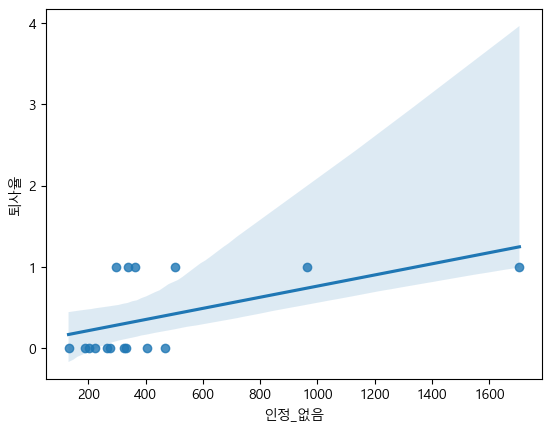

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_high["인정_없음"], y=df_high['퇴사율'])

In [8]:
mean = int(pd.Series(new_2020).mean()+0.5)

df_low = pd.DataFrame({"인정_있음": clist2, "신입_퇴사자": new_2020})
df_low["퇴사율"] = (df_low["신입_퇴사자"] < mean).astype(int)

X = df_low["인정_있음"]
y = df_low["퇴사율"]

correlation_not_reasonable_concede = X.corr(y)


print(f"인정 있는 것과 신입 퇴사자의 상관관계 : {correlation_not_reasonable_concede}")


인정 있는 것과 신입 퇴사자의 상관관계 : -0.5356625634766858


<Axes: xlabel='인정_있음', ylabel='퇴사율'>

c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\dawoo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


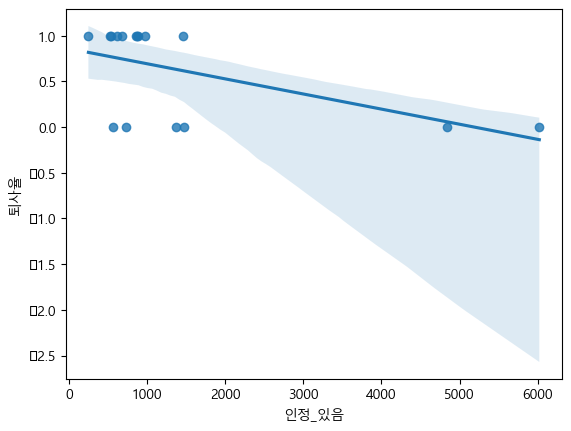

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
sns.regplot(x=df_low['인정_있음'], y=df_low['퇴사율'])